# SetUp:

In [1]:
# -*- coding: utf-8 -*-


import os
#os.chdir(r'Path\to\your\pictures')

import random
random.seed(1)
# Display Image:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import figure
import math
import numpy as np 
# pip install opencv-python
import cv2
# -*- coding: utf-8 -*-


-----------------------------------------
# normal und rgb:

<Figure size 800x800 with 0 Axes>

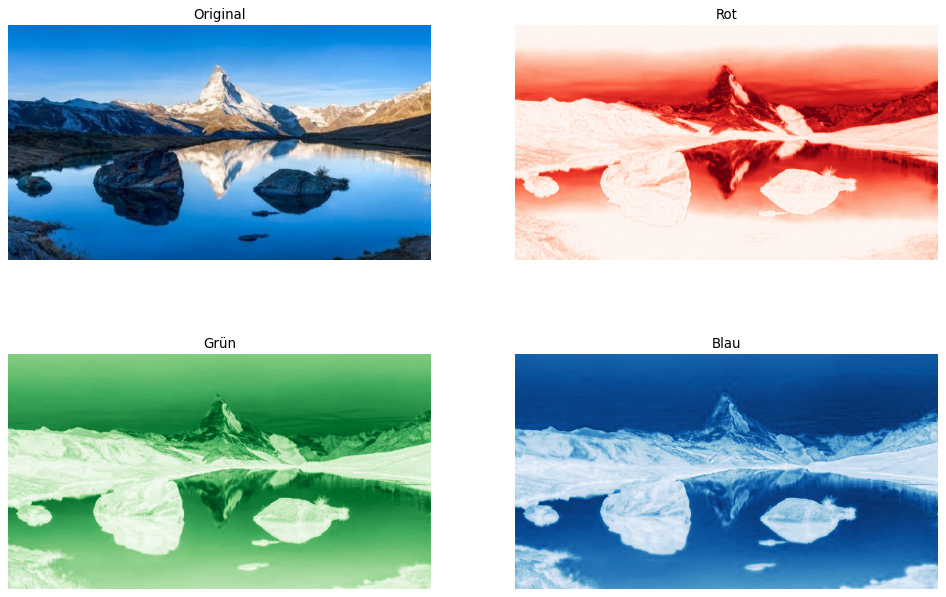

In [2]:
#pic = 'pics\\munich_skyline.jpg'
pic = 'pics\\porsche.jpg'
pic = 'pics\\horizont.jpg'
#pic = 'pics\\pic_01.jpg'

figure(num=None, figsize=(10, 10), dpi=80, edgecolor='k')
#img=mpimg.imread(pic)
img=cv2.imread(pic)

# Aufteilung in RGB-Bilder
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img_rgb)

titles = ['Original', 'Rot', 'Grün', 'Blau']
images = [cv2.merge((r,g,b)), r, g, b]
cmaps = [None, 'Reds', 'Greens', 'Blues']

#Darstellung des Originals und der RGB-Bilder:
# stärke Farbe in RGB-Bildern steht für höhere RGB-Werte,
# alle Farben auf Maximum ergibt weiss, siehe Berg im Bild
figure(num=None, figsize=(15, 10), dpi=80, edgecolor='k')
for i in range(len(images)):
    plt.subplot(math.sqrt(len(images)),math.sqrt(len(images)),i+1)
    plt.imshow(images[i], cmap = cmaps[i])
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
plt.show()


-----
# rotate Image:


pip install imgaug
oder pip install git+https://github.com/aleju/imgaug

wenn Obriges nicht funktioniert:

pip install six numpy scipy Pillow matplotlib scikit-image opencv-python

conda install Shapely

pip install imgaug




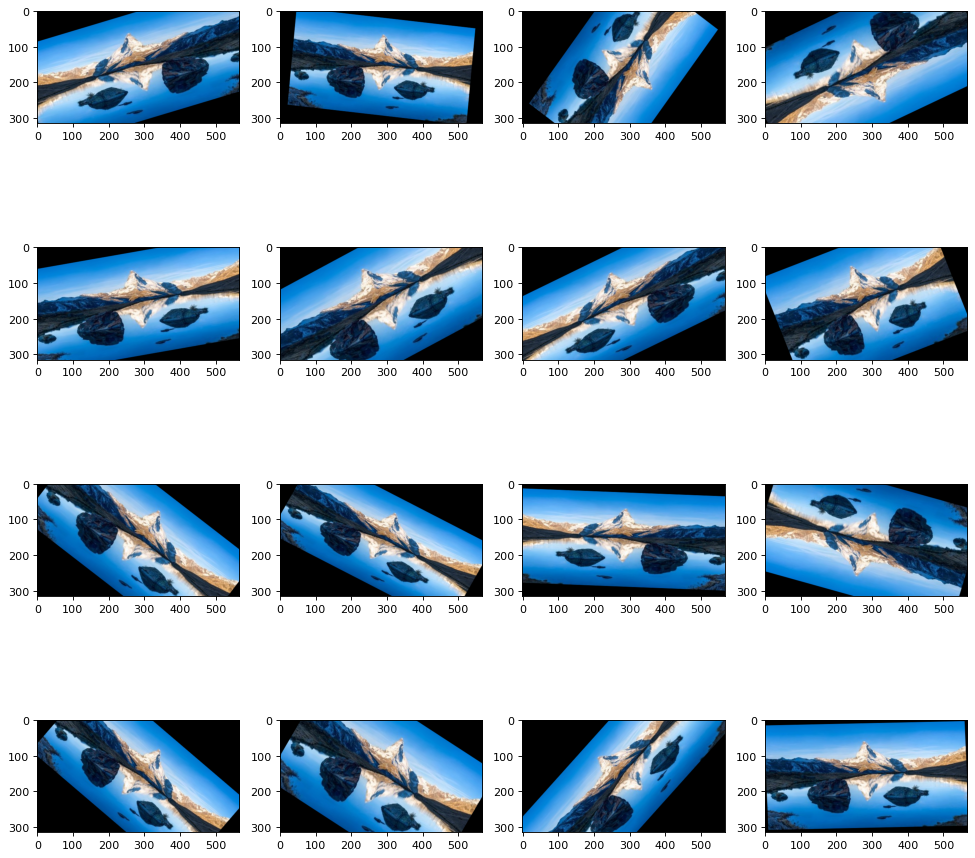

In [3]:
import imgaug as ia
from imgaug import augmenters as iaa

ia.seed(1)

seq = iaa.Sequential([
    iaa.Fliplr(0.5), # horizontal flips
    iaa.Flipud(0.3), # vertical rotation
    #iaa.Crop(percent=(0, 0.1)), # random crops
    
    # Small gaussian blur with random sigma between 0 and 0.5.
    # But we only blur about 50% of all images.
    #iaa.Sometimes(0.5,
    #    iaa.GaussianBlur(sigma=(0, 0.5))
    #),
    
    # Strengthen or weaken the contrast in each image.
    #iaa.ContrastNormalization((0.75, 1.5)),
    
    # Add gaussian noise.
    # For 50% of all images, we sample the noise once per pixel.
    # For the other 50% of all images, we sample the noise per pixel AND
    # channel. This can change the color (not only brightness) of the
    # pixels.
    #iaa.AdditiveGaussianNoise(loc=0, scale=(0.0, 0.05*255), per_channel=0.5),
    
    # Make some images brighter and some darker.
    # In 20% of all cases, we sample the multiplier once per channel,
    # which can end up changing the color of the images.
    #iaa.Multiply((0.8, 1.2), per_channel=0.2),
    
    # Apply affine transformations to each image.
    # Scale/zoom them, translate/move them, rotate them and shear them.
    iaa.Affine(
        scale = {"x": (0.8, 1.2), "y": (0.8, 1.2)},
        #translate_percent={"x": (-0.2, 0.2), "y": (-0.2, 0.2)},
        rotate = (-40, 40),
        shear = (-20, 20)
        
    )
], random_order=True)

dims = 4
figure(num=None, figsize=(15, 15), dpi=80, edgecolor='k')
for i in range(dims**2):
    plt.subplot(dims,dims,i+1)
    image_aug = seq.augment_image(img_rgb)
    plt.imshow(image_aug)
plt.show()




---
# convotule Image

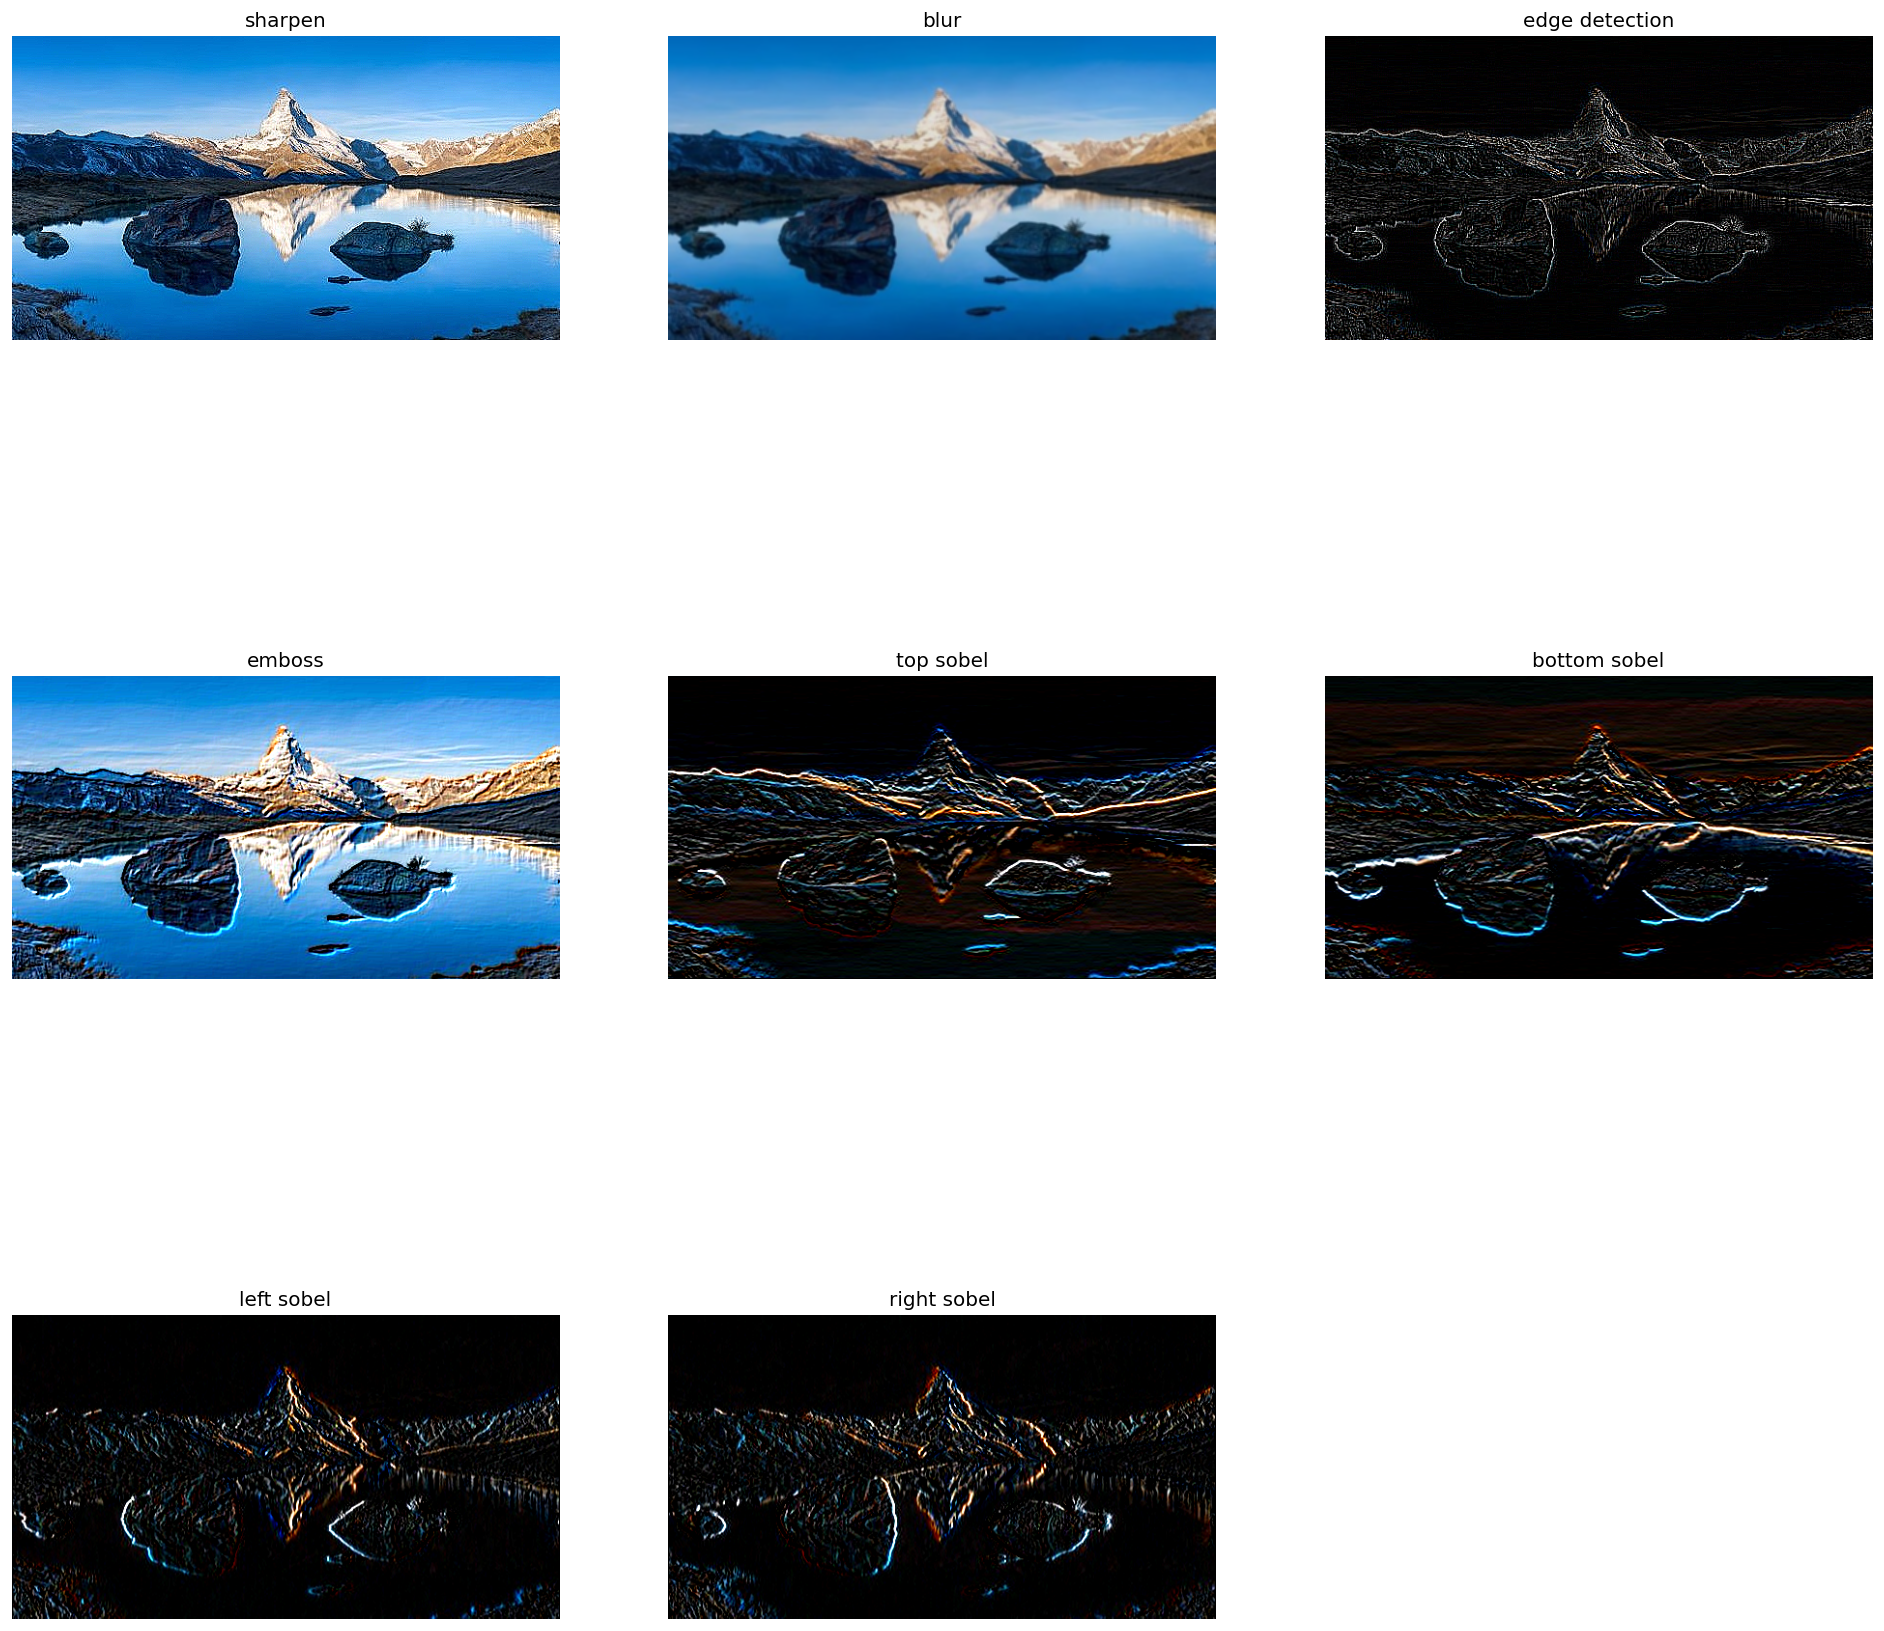

In [5]:
#sharpen:
    
matrix_A = np.array([[0, -1, 0],
                     [-1, 5, -1],
                     [0, -1, 0]])
#blur:
matrix_B = np.array([[.1,.1,.1],
                     [.1,.1,.1],
                     [.1,.1,.1]
                     ])
# gaussian blur    
#matrix_B = np.array([[0,0,0,5,0,0,0],
#                     [0,5,18,32,18,5,0],
#                     [0,18,64,100,64,18,0],
#                     [5,32,100,100,100,32,5],
#                     [0,18,64,100,64,18,0],
#                     [0,5,18,32,18,5,0],
#                     [0,0,0,5,0,0,0]])
#matrix_B = matrix_B.tolist()
#matrix_B = [[i/800 for i in j] for j in matrix_B]
#matrix_B = np.array(matrix_B)
    
# edge_detect
matrix_C = np.array([[0, -1, 0],
                     [-1, 4, -1],
                     [0, -1, 0]])
    
matrix_C = np.array([[-1, -1, -1],
                     [-1, 8, -1],
                     [-1, -1, -1]])
# emboss
matrix_D = np.array([[-2, -1, 0],
                     [-1, 1, 1],
                     [0, 1, 2]])
    
# top sobel
matrix_E = np.array([[1,2,1],
                     [0,0,0],
                     [-1,-2,-1]])
# bottom sobel
matrix_F = np.array([[-1,-2,-1],
                     [0,0,0],
                     [1,2,1]])
# left sobel
matrix_G = np.array([[1, 0, -1],
                     [2, 0, -2],
                     [1, 0, -1]])
# right sobel
matrix_H = np.array([[-1, 0, 1],
                     [-2, 0, 2],
                     [-1, 0, 1]])


filter_list = [matrix_A, matrix_B, matrix_C, matrix_D,
               matrix_E, matrix_F, matrix_G, matrix_H]
titles = ['sharpen','blur','edge detection','emboss',
          'top sobel','bottom sobel','left sobel','right sobel']
figure(num=None, figsize=(20,20), dpi=120, edgecolor='k')
len_filter = len(filter_list)
dims = math.ceil(math.sqrt(len(filter_list)))
for i in range(len(filter_list)):
    plt.subplot(dims,dims,i+1) 
    matrix = filter_list[i]
    conv = iaa.Convolve(matrix=matrix)
    image_aug = conv.augment_image(img_rgb)
    plt.imshow(image_aug)
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
plt.show()
